## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import sklearn as sk
from sklearn import preprocessing, model_selection
from scipy import stats

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

2024-03-03 18:32:13.259261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 18:32:13.362035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-03 18:32:13.362056: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-03 18:32:13.388112: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 18:32:13.947826: W tensorflow/stream_executor/platform/de

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

## Processing data on 5 minute walking

In [28]:
def load_data(file_path, refresh_rate=100):
    df = pd.read_csv(file_path)
    
    # Insert time column
    arr = np.arange(0, len(df) // refresh_rate + 1, 1 / refresh_rate)
    to_trim = len(df) - len(arr)
    df.insert(0, 'time', arr[:to_trim])
    
    return df

In [36]:
def plot_activity(data, name: str = ''):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, data['time'], data['accel_x'], 'X-Axis')  # x
    plot_axis(ax1, data['time'], data['accel_y'], 'Y-Axis')  # y
    plot_axis(ax2, data['time'], data['accel_z'], 'Z-Axis')  # z
    plt.suptitle(name)
    plt.subplots_adjust(hspace=0.2)
    plt.subplots_adjust(top=0.90)
    plt.show()


def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title, fontsize=10)

    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

In [29]:
walking_left = load_data('experiments/5minwalk/device_red_B1A104.csv')
walking_right = load_data('experiments/5minwalk/device_red_B0A105.csv')

stationary_left = load_data('experiments/stationary/device_red_B1A104.csv')
stationary_right = load_data('experiments/stationary/device_red_B0A105.csv')

In [32]:
# Extract from second 50 to 150
begin_time = 50
end_time = 150

left_sensor_filtered = walking_left[(walking_left['time'] >= begin_time) & (walking_left['time'] <= end_time)]
right_sensor_filtered = walking_right[(walking_right['time'] >= begin_time) & (walking_right['time'] <= end_time)]

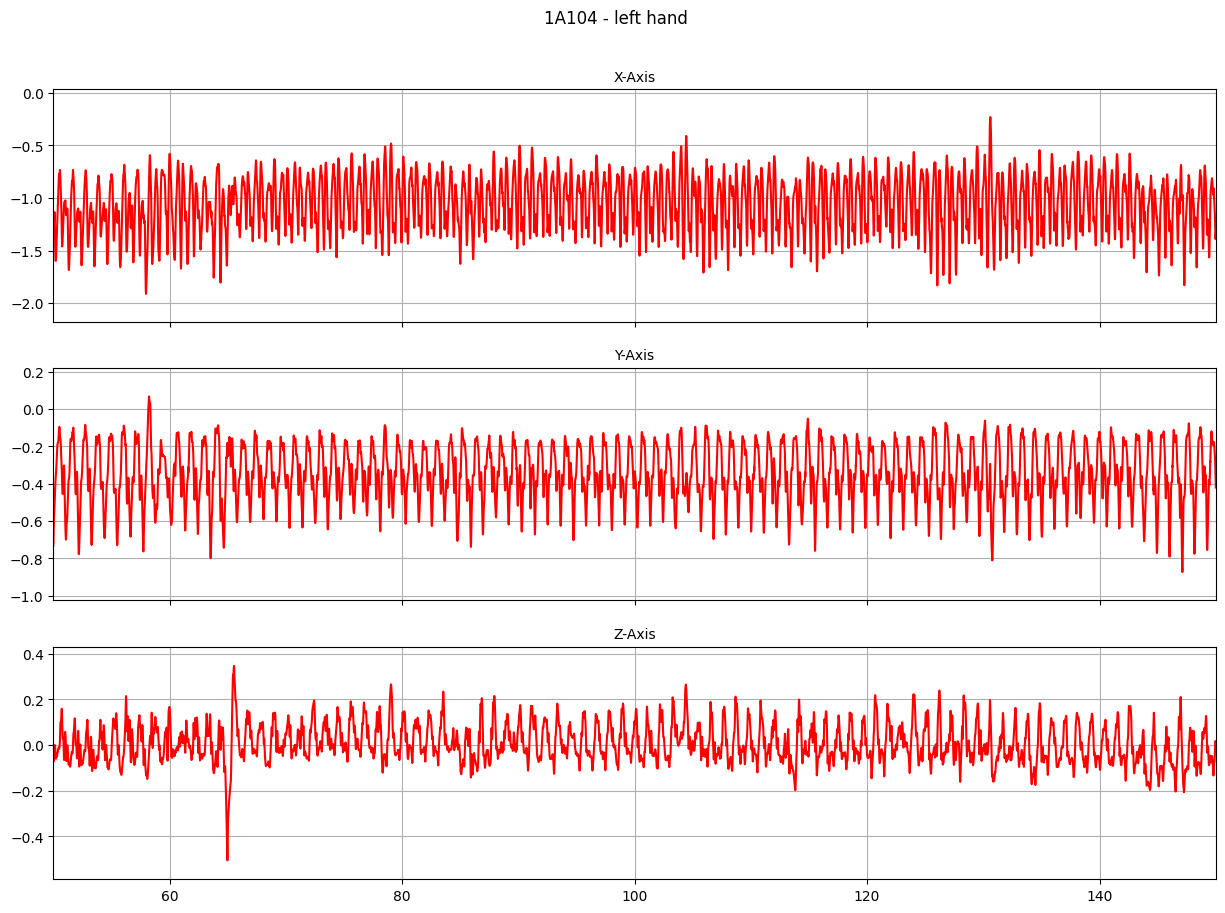

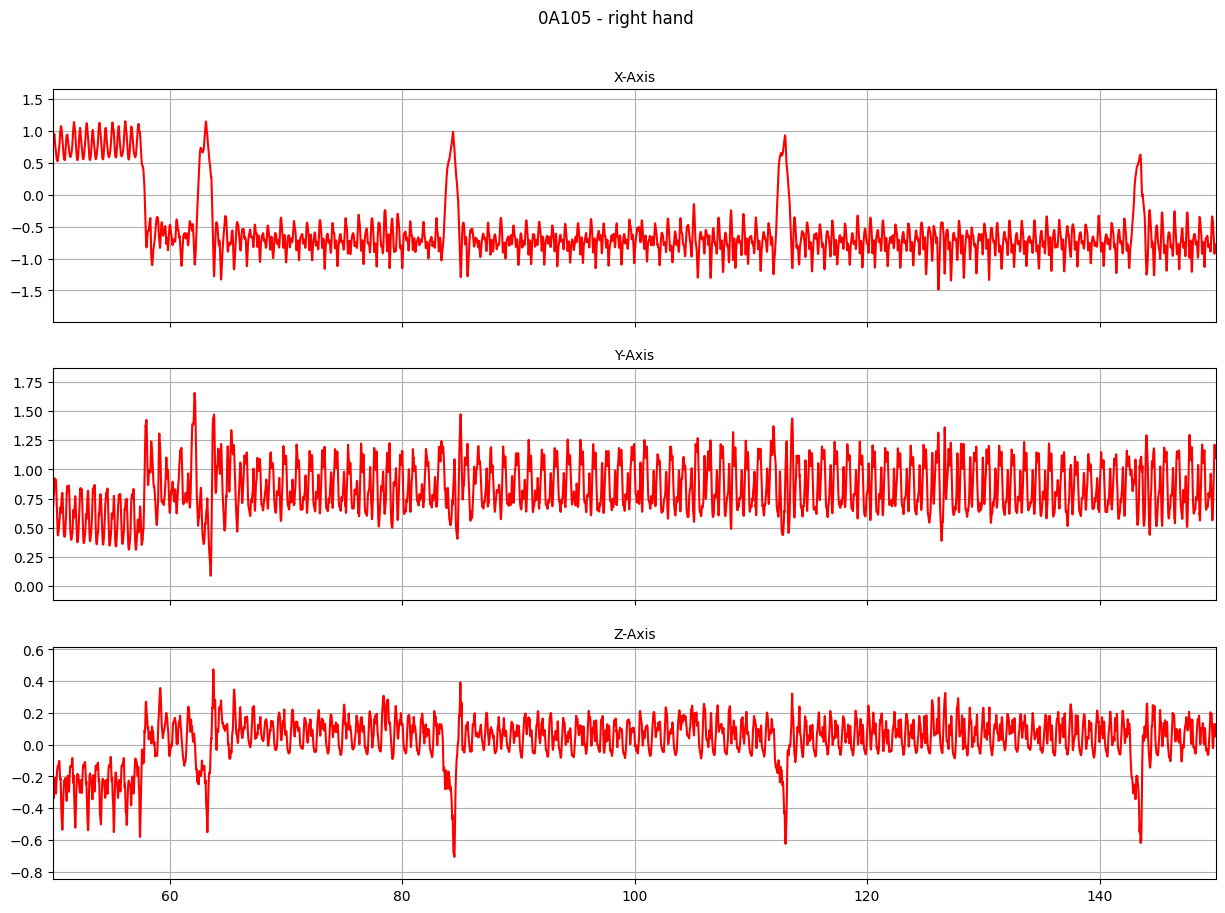

In [40]:
plot_activity(data=left_sensor_filtered, name='1A104 - left hand')
plot_activity(data=right_sensor_filtered, name='0A105 - right hand')

In [52]:
extended_left_sensor = pd.concat([stationary_left] * 5, ignore_index=True)
extended_right_sensor = pd.concat([stationary_right] * 20, ignore_index=True)

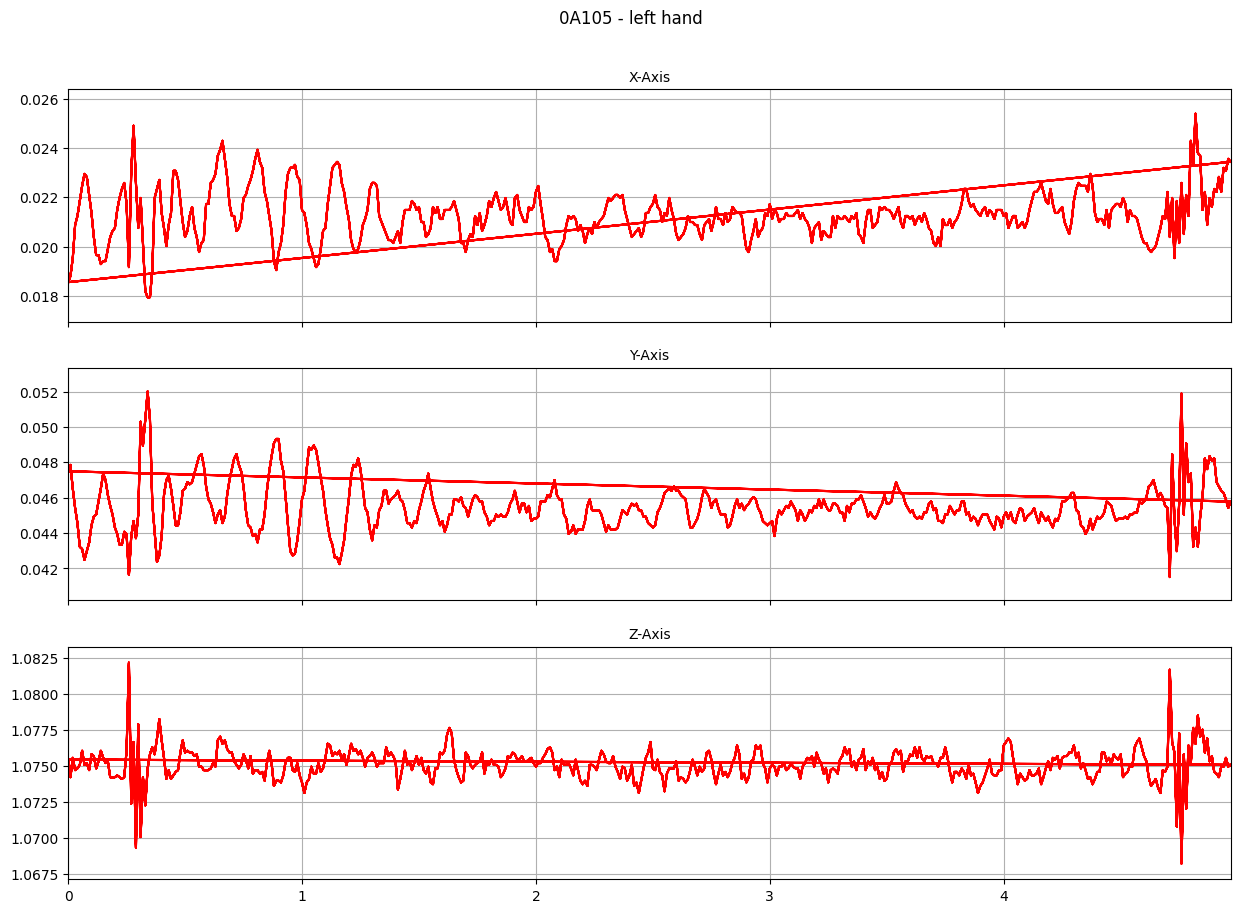

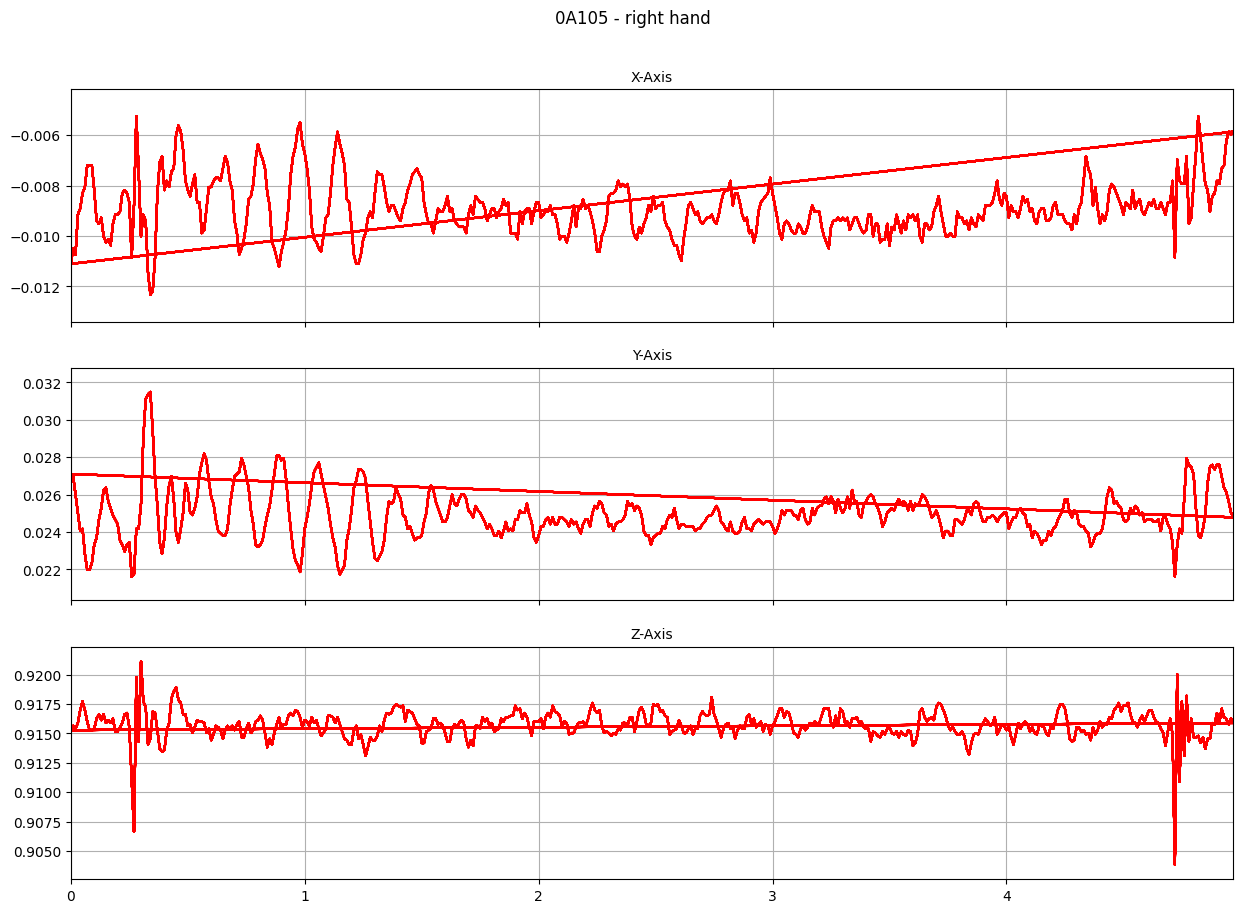

In [53]:
plot_activity(data=extended_left_sensor, name='0A105 - left hand')
plot_activity(data=extended_right_sensor, name='0A105 - right hand')